In [2]:
!wget -nc https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2022-06-28 05:56:12--  https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.164.176, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  --.-KB/s    in 0.06s   

2022-06-28 05:56:13 (42.4 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [3]:
!unzip -nq data/spa-eng.zip

In [4]:
!head data/spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [1]:
from transformers import pipeline
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")

/anaconda/envs/transformers-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
eng2spa = {}
for line in open('data/spa-eng/spa.txt'):
    line = line.rstrip()
    eng, spa = line.split("\t")
    if eng not in eng2spa:
        eng2spa[eng] = []
    eng2spa[eng].append(spa)

In [3]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [4]:
tokenizer.tokenize('¿Qué hay de nuevo?'.lower())

['qué', 'hay', 'de', 'nuevo']

In [5]:
# tokens = tokenizer.tokenize('¿Qué me cuentas?'.lower())
tokens = tokenizer.tokenize('¿Qué hay de nuevo?'.lower())
sentence_bleu([tokens],tokens)

1.0

In [28]:
sentence_bleu([["hi"]],['hi'])

/anaconda/envs/transformers-env/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/anaconda/envs/transformers-env/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/anaconda/envs/transformers-env/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using low

1.821831989445342e-231

In [6]:
smoother = SmoothingFunction()
sentence_bleu([["hi"]],['hi'], smoothing_function=smoother.method4)

1.0

In [7]:
sentence_bleu([[1,2,3,4]],[1,2,3,4])

1.0

In [8]:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
    spa_list_tokens = []
    for text in spa_list:
        tokens = tokenizer.tokenize(text.lower())
        spa_list_tokens.append(tokens)
    eng2spa_tokens[eng] = spa_list_tokens

In [9]:
!pip install transformers sentencepiece transformers[sentencepiece]

In [10]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

Downloading: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 783k/783k [00:00<00:00, 14.4MB/s]


In [11]:
translator('I like eggs and ham')

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [12]:
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [21]:
eng_phrases_subset = eng_phrases[20_000:20100]

In [22]:
translations = translator(eng_phrases_subset)

In [23]:
eng_phrases_subset[0]

'Tom is in the garden.'

In [24]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [37]:
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
    matches = eng2spa_tokens[eng]

    #tokenize predicitons
    spa_pred = tokenizer.tokenize(pred['translation_text'].lower())

    score = sentence_bleu(matches, spa_pred,smoothing_function=smoother.method2)
    scores.append(score)

In [38]:
scores

[1.0,
 1.0,
 0.36064528799877893,
 0.6580370064762462,
 1.0,
 0.42728700639623407,
 0.5318295896944989,
 1.0,
 0.42728700639623407,
 0.8408964152537145,
 0.5,
 0.5318295896944989,
 0.7521206186172787,
 1.0,
 1.0,
 1.0,
 0.4041031009353247,
 0.4472135954999579,
 1.0,
 0.2925226826055808,
 0.3478700554542393,
 0.3478700554542393,
 0.3478700554542393,
 0.6580370064762462,
 0.29642151188002913,
 1.0,
 0.4472135954999579,
 0.6580370064762462,
 1.0,
 1.0,
 0.6580370064762462,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8408964152537145,
 1.0,
 1.0,
 1.0,
 0.5055201539008864,
 1.0,
 1.0,
 1.0,
 1.0,
 0.24880469496253566,
 0.19304869754804482,
 0.4671379777282001,
 0.6511126026643229,
 1.0,
 0.8034284189446518,
 0.8408964152537145,
 0.5773502691896257,
 0.3478700554542393,
 0.8408964152537145,
 0.4518010018049224,
 0.28574404296988,
 0.5506953149031838,
 0.2310997417025822,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6511126026643229,
 0.33085163614992613,
 0.27821195481929917,
 0.5,
 0.3894

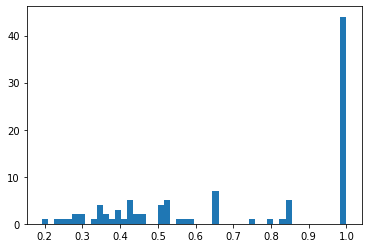

In [39]:
import matplotlib.pyplot as plt
plt.hist(scores, bins = 50)
plt.show()

In [40]:
import numpy as np
np.mean(scores)

0.7202547960156324

In [50]:
np.random.seed(1)

def print_random_translations():
    i = np.random.choice(len(eng_phrases_subset))
    eng = eng_phrases_subset[i]
    print("EN: ",eng)

    translation = translations[i]['translation_text']
    print('ES Translation: ', translation)

    matches = eng2spa[eng]
    print('Matches: ',matches)

    matches_tokens = eng2spa_tokens[eng]
    #tokenize predicitons
    spa_pred = tokenizer.tokenize(translation.lower())
    score = sentence_bleu(matches_tokens, spa_pred,smoothing_function=smoother.method2)
    print("Bleu Score: ",score)

In [51]:
print_random_translations()

EN:  Tom isn't that young.
ES Translation:  Tom no es tan joven.
Matches:  ['Tom no es tan joven.']
Bleu Score:  1.0


In [52]:
print_random_translations()

EN:  Tom is proud of Mary.
ES Translation:  Tom está orgulloso de María.
Matches:  ['Tom está orgulloso de Mary.']
Bleu Score:  0.7521206186172787


In [53]:
print_random_translations()

EN:  Tom must be Canadian.
ES Translation:  Tom debe ser canadiense.
Matches:  ['Tom tiene que ser canadiense.']
Bleu Score:  0.38940039153570244
